
# **The Data Science Method**  


1.   [Problem Identification](https://medium.com/@aiden.dataminer/the-data-science-method-problem-identification-6ffcda1e5152)

2.   [**Data Wrangling**](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-data-collection-organization-and-definitions-d19b6ff141c4) 
  * Data Organization - Using cookiecutter template with some modifications to start.
  * Data Collection - Collected data from wikipedia and yahoo finance price dataset. The wikipedia showed us the currect S&P 500 companies and then used their ticker symbols to query yahoo finance adj. close prices.
      - Load the S&P 500 tickers from wikipedia page
      - Get S&P 500 Index (^GSPC) as a Bench Mark
      - Use S&P Symbols to Get Adj Close from Yahoo Finance
  * Data Cleaning - The S&P 500 data from yahoo finance price is almost clean and ready for analysis use. Need to remove tickers that IPO or die mid year, creating usable Nan values.
  * Basic Data Visualizations 
  * Data Definition 

 
3.   [Exploratory Data Analysis](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9)
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   [Pre-processing and Training Data Development](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967)
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   [Modeling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b)
  * Create dummy or indicator features for categorical variable
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   [Documentation](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-documentation-c92c28bd45e6)

  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation



# Data Wrangling

## Data Organization

First, loads the needed packages and modules into Python. 
Then, look at project data structure similar to cookie cutter to create directory path variables.

In [1]:
#load python packages
import os
from bs4 import BeautifulSoup
import pandas as pd

# import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import quandl
from yahooquery import Ticker
import requests
# import dotenv

# from IPython.html import widgets
from IPython.display import display



# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
# prints current directory 
current_dir = os.getcwd() 
print("Current Directory: ") 
print(current_dir) 

Current Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization/notebooks/exploratory


In [3]:
# prints parent directory 
project_dir = os.path.abspath(os.path.join(os.path.join(current_dir, os.pardir), os.pardir))
print("Parent Directory: ") 
print(project_dir) 

Parent Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization


In [4]:
os.chdir(project_dir)
os.listdir()

['LICENSE',
 'environment.yml',
 'models',
 'README.md',
 '.gitignore',
 '.git',
 'data',
 'notebooks',
 'reports',
 '.idea',
 'src']

In [5]:
data_interim_dir = '/data/interim/'
data_raw_dir = '/data/raw/'

## Data Collection

Setup for future visualizations.

In [6]:
%matplotlib inline

plt.style.use('dark_background')
c = ['white', 'springgreen', 'fuchsia', 'lightcoral', 'red'] # Color
s = [24, 20, 16, 12]  # Size
w = [0.75, 1, 1.25, 1.50] # Line Width
ga = 0.10 # Grid Alpha

The start and end date window for S&P 500 analysis

In [7]:
start_date = "2019-01-01"
end_date = "2020-01-01"

### Load the S&P 500 tickers from wikipedia page - https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

We will find the current S&P 500 companies from wikipedia using panads html table scraper.
Read S&P 500 data into a list, pandas dataframe and save in csv for future pipelining.


In [8]:
input_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
wiki_tables = pd.read_html(input_url)
for table in wiki_tables:
    print(table.head())
    print('-----------------------------------------------------------------------------------------')

  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

In [9]:
sp500_wiki_df = wiki_tables[0]
print(sp500_wiki_df.head())


  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81


Save wiki query dataframe in raw directory.

In [10]:
sp500_wiki_df.to_csv(project_dir + '/data/raw/'+ 'sp500_wiki_df_raw.csv', index=False)

In [11]:
sp500_wiki_df = pd.read_csv(project_dir + '/data/raw/'+ 'sp500_wiki_df_raw.csv')

In [12]:
sp500_wiki_df['Symbol'] = sp500_wiki_df['Symbol'].str.replace('.', '-', regex=False)
sp500_tickers = sp500_wiki_df['Symbol'].tolist()
sp500_tickers_df = sp500_wiki_df['Symbol'].copy()
sp500_tickers_df

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [13]:
# from src.util import SP500SymbolDataRequest

# sp500_sdr = SP500SymbolDataRequest()
# sp500_sdr.to_csv(project_dir + data_interim_dir + 'SP500_from_wiki.csv')
# sp500_tickers = sp500_sdr.to_list()
# sp500_tickers_df  = pd.DataFrame(sp500_tickers, columns=['Symbol']) 

Let's take a look at the SP500 GICS Sector & sub sector count to see the how many tickers correspond to each sector. 

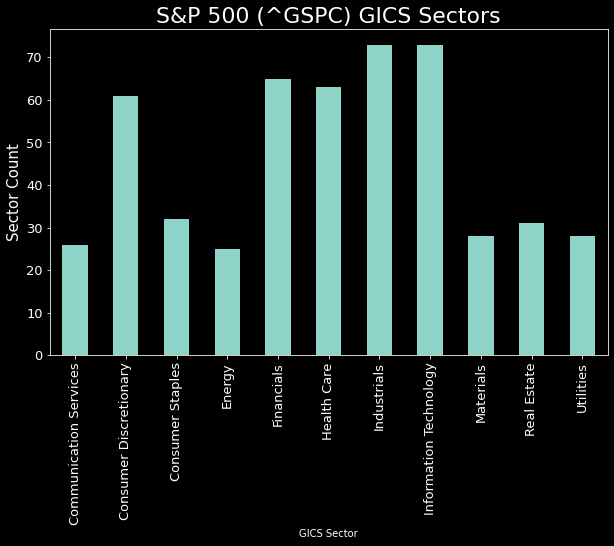

In [14]:
sp500_wiki_df_sectors = sp500_wiki_df.groupby(["GICS Sector"])["Symbol"].count()

ax = sp500_wiki_df_sectors.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("S&P 500 (^GSPC) GICS Sectors", fontsize=22)
ax.set_ylabel("Sector Count", fontsize=15);
plt.show()


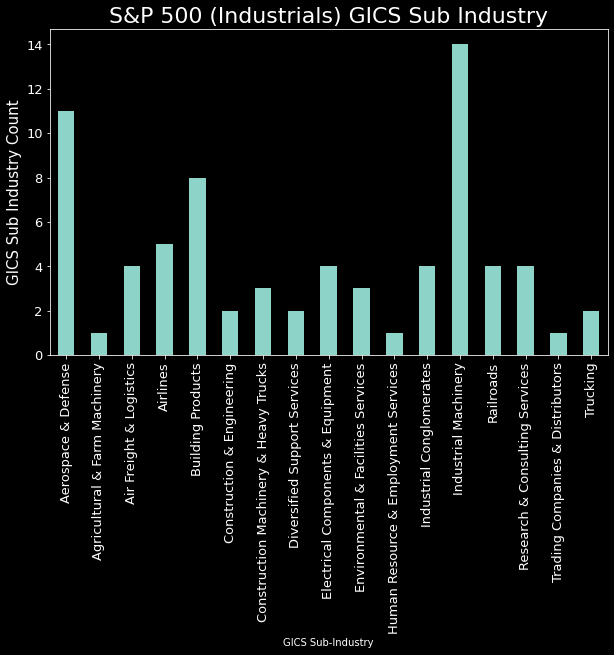

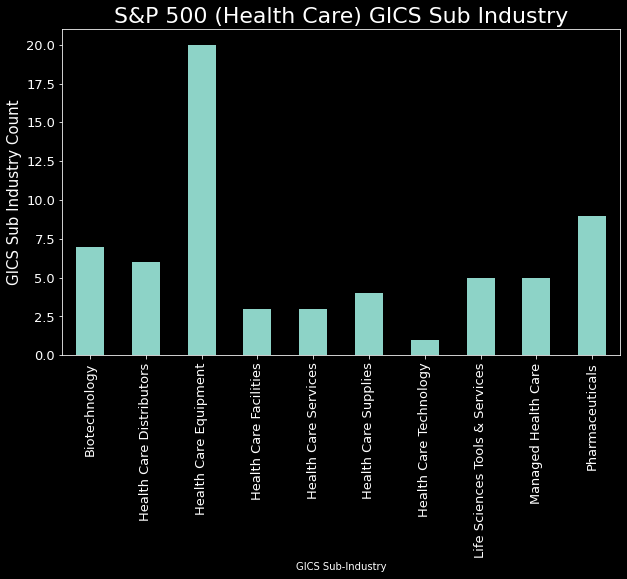

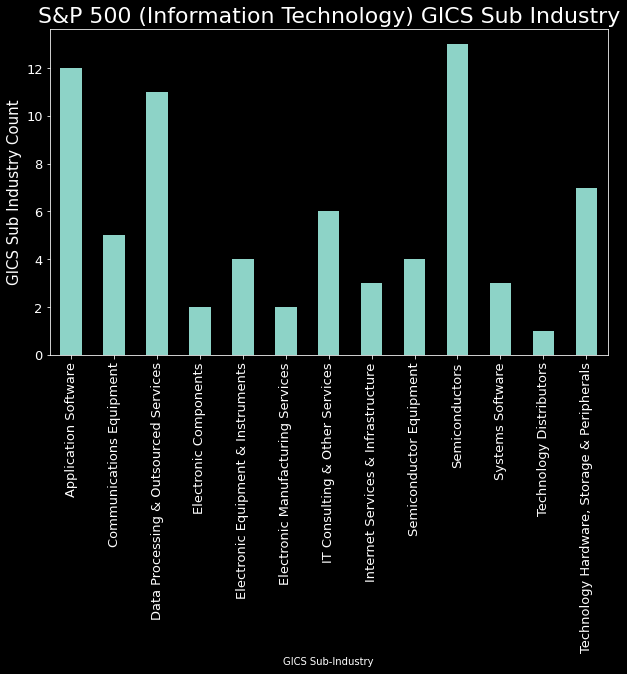

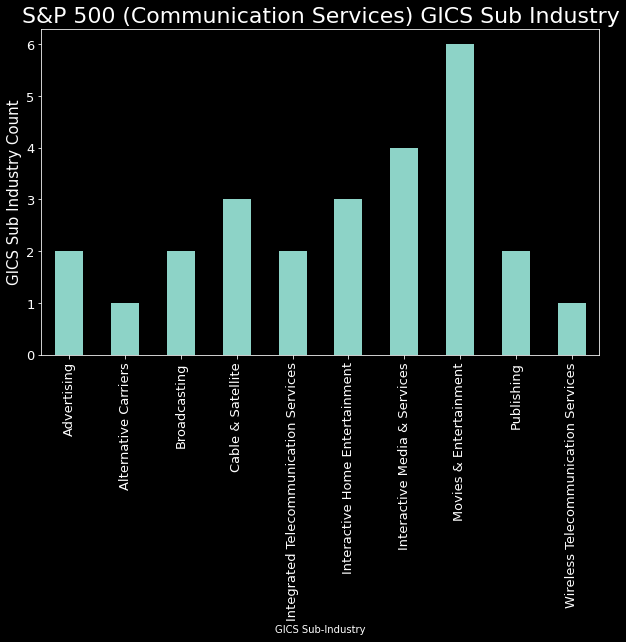

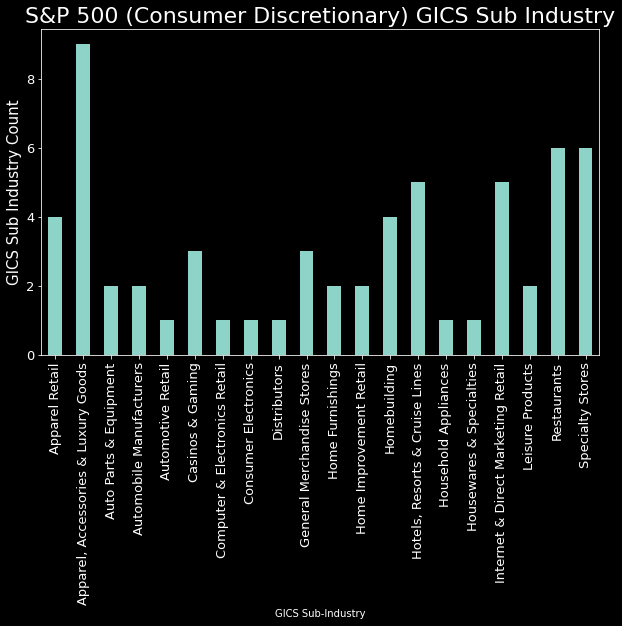

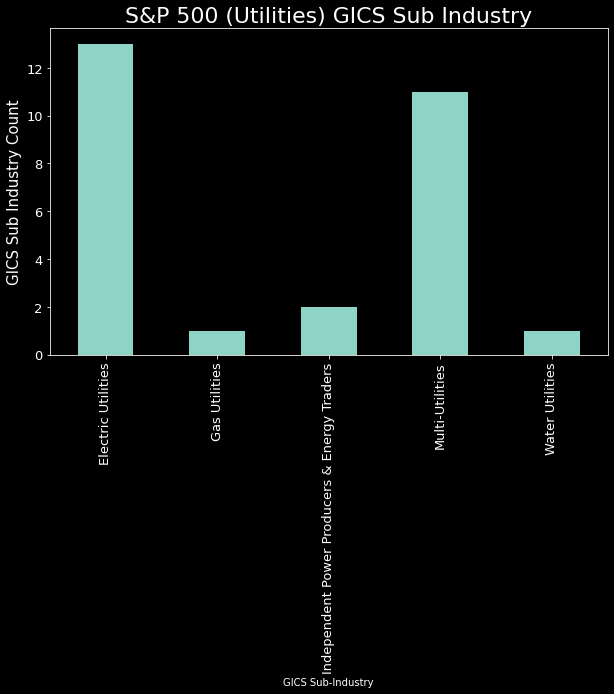

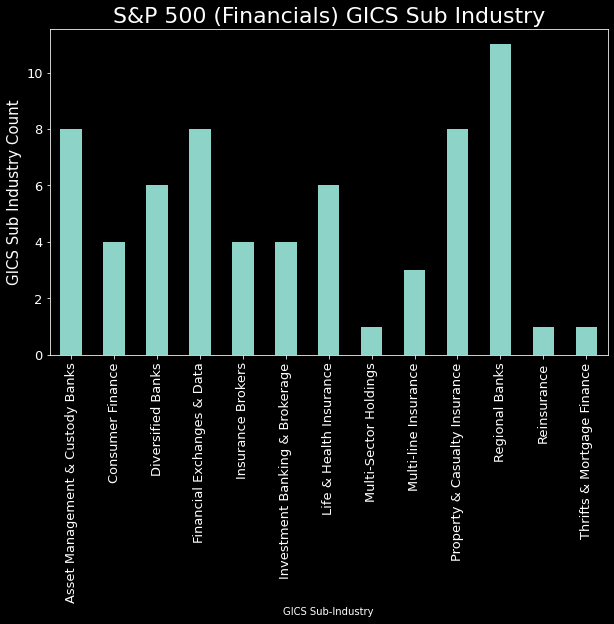

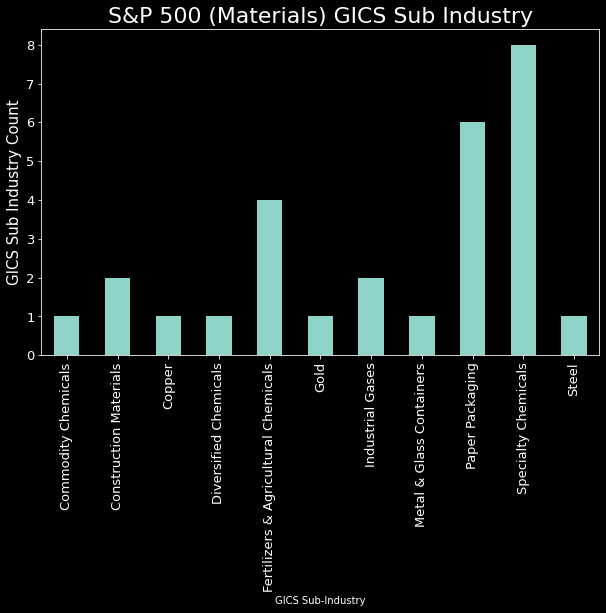

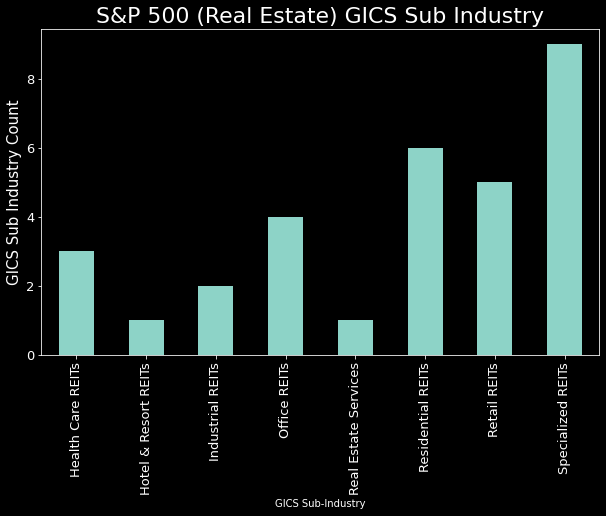

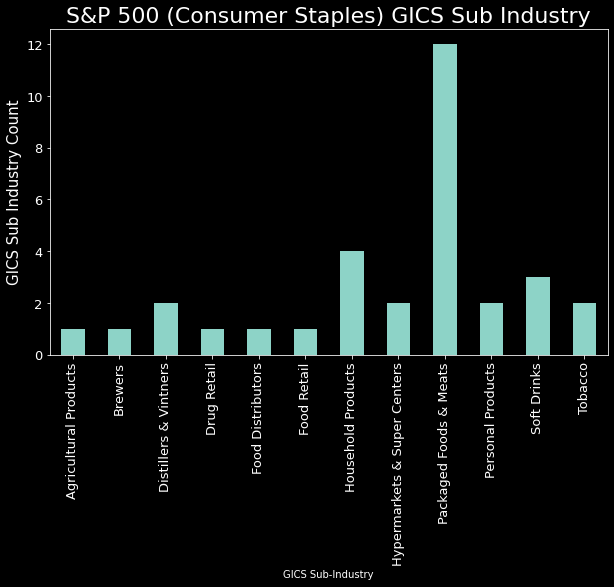

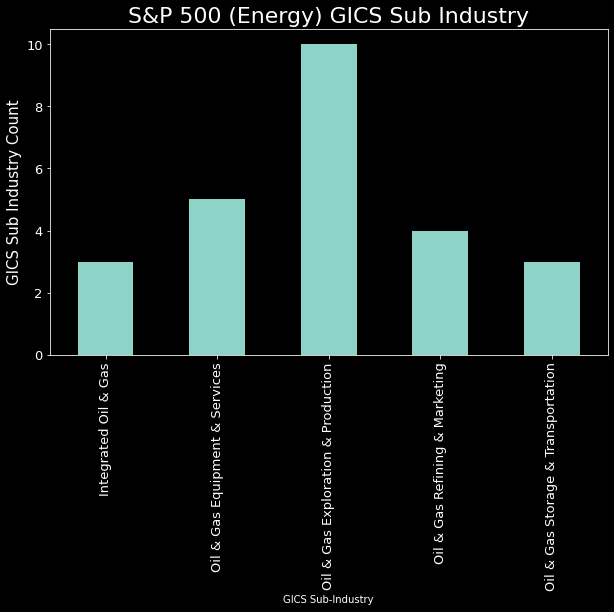

In [15]:
sp500_wiki_df_sectors_sub_ind = sp500_wiki_df.groupby(["GICS Sector", "GICS Sub-Industry"])["Symbol"].count()
sp500_sectors = sp500_wiki_df["GICS Sector"].unique()

for sector in sp500_sectors:
    sp500_sector = sp500_wiki_df[sp500_wiki_df["GICS Sector"] == sector]
    sp500_wiki_df_sub_sectors = sp500_sector.groupby(["GICS Sub-Industry"])["Symbol"].count()

    ax = sp500_wiki_df_sub_sectors.plot(kind='bar', figsize=(10,6), fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(f"S&P 500 ({sector}) GICS Sub Industry", fontsize=22)
    ax.set_ylabel("GICS Sub Industry Count", fontsize=15);
    plt.show()

In [16]:
sp500_wiki_df.groupby(["GICS Sector", "GICS Sub-Industry"])["Symbol"].count().tail(60)

GICS Sector             GICS Sub-Industry                           
Health Care             Health Care Services                             3
                        Health Care Supplies                             4
                        Health Care Technology                           1
                        Life Sciences Tools & Services                   5
                        Managed Health Care                              5
                        Pharmaceuticals                                  9
Industrials             Aerospace & Defense                             11
                        Agricultural & Farm Machinery                    1
                        Air Freight & Logistics                          4
                        Airlines                                         5
                        Building Products                                8
                        Construction & Engineering                       2
                        Constru

### Load the S&P 500 weights per tickers via  slick charts sp500 page - https://www.slickcharts.com/sp500

In [17]:
input_url = "https://www.slickcharts.com/sp500"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
res = requests.get(input_url, headers=headers)

soup = BeautifulSoup(res.content, 'lxml')
tables = soup.find_all('table') 

sp500_slick_df = pd.read_html(str(tables[0]))[0]
print(sp500_slick_df.head())


   #                Company Symbol    Weight    Price    Chg    % Chg
0  1             Apple Inc.   AAPL  6.562488     0.00   0.00  (0.00%)
1  2  Microsoft Corporation   MSFT  5.705802   215.25   1.03  (0.48%)
2  3        Amazon.com Inc.   AMZN  4.806151     0.00   0.00  (0.00%)
3  4  Facebook Inc. Class A     FB  2.212009   275.25  13.85  (5.30%)
4  5  Alphabet Inc. Class A  GOOGL  1.617927  1570.79  40.84  (2.67%)


Save slick query dataframe in raw directory.

In [18]:
sp500_slick_df.to_csv(project_dir + '/data/raw/'+ 'sp500_slick_df_raw.csv', index=False)

In [19]:
# sp500_slick_df1 = pd.read_csv(project_dir + '/data/raw/'+ 'sp500_slick_df_raw.csv')

In [20]:
print(sp500_slick_df.Weight.sum())
print(sp500_slick_df.shape)
print(sp500_slick_df)


99.990684
(505, 7)
       #                    Company Symbol    Weight    Price    Chg    % Chg
0      1                 Apple Inc.   AAPL  6.562488     0.00   0.00  (0.00%)
1      2      Microsoft Corporation   MSFT  5.705802   215.25   1.03  (0.48%)
2      3            Amazon.com Inc.   AMZN  4.806151     0.00   0.00  (0.00%)
3      4      Facebook Inc. Class A     FB  2.212009   275.25  13.85  (5.30%)
4      5      Alphabet Inc. Class A  GOOGL  1.617927  1570.79  40.84  (2.67%)
..   ...                        ...    ...       ...      ...    ...      ...
500  501             TechnipFMC Plc    FTI  0.010281     7.28   0.32  (4.60%)
501  502  HollyFrontier Corporation    HFC  0.010155    19.60   0.13  (0.67%)
502  503  Under Armour Inc. Class A    UAA  0.008463    13.47   0.21  (1.58%)
503  504  Under Armour Inc. Class C     UA  0.007870    11.78   0.22  (1.90%)
504  505   News Corporation Class B    NWS  0.005936    13.80   0.12  (0.88%)

[505 rows x 7 columns]


In [21]:


# sp500_info_df = sp500_slick_df.copy()
# sp500_info_df.head()


In [22]:
# sp500_info_df["Market Cap"] = np.nan
# sp500_info_df.head()

In [23]:
# sp500_info_df.drop('#', axis=1, inplace=True)
# sp500_info_df.set_index('Symbol', inplace=True)
# sp500_info_df.head()

In [24]:
# sp500_info_df.index = sp500_info_df.index.str.replace('.', '-', regex=False)


In [25]:
# for k, v in yf_data_price.items():
#     sp500_info_df.loc[k,'Market Cap'] = v['marketCap'] 

In [26]:
# print(sp500_info_df.head())
# print()
# print('Nan Count: ', sp500_info_df['Market Cap'].isna().sum())
# sp500_info_df[sp500_info_df['Market Cap'].isna()]

In [27]:
# sp500_info_df['www1'] = sp500_info_df['Market Cap']
# sp500_info_df['www2'] = sp500_info_df['Market Cap'].sum()
# sp500_info_df['Change'] =  sp500_info_df['Market Cap']/sp500_info_df['Market Cap'].sum() * 100


# sp500_info_df['www'].sum()

In [28]:
# sp500_info_df

In [29]:
# xxxx = sp500_info_df['Market Cap']*sp500_info_df['Market Cap'].sum()
# xxxx


## Big todo: Do this for slick charts for weights

In [30]:
# from src.util import SP500SymbolDataRequest

# sp500_sdr = SP500SymbolDataRequest()
# sp500_sdr.to_csv(project_dir + data_interim_dir + 'SP500_from_wiki.csv')

### Get S&P 500 Index (^GSPC) as a Bench Mark from Yahoo Finance with yahooquery's Ticker

In [31]:
tickers = Ticker('^GSPC', asynchronous=True)
yf_data = tickers.history(start=start_date, end=end_date)
yf_data = yf_data.adjclose
df = yf_data.reset_index(level='symbol')

table = df.pivot(columns='symbol')

table.columns = [col[1] for col in table.columns]
sp500_index = table
sp500_index

,^GSPC
date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912
...,...
2019-12-24,3223.379883
2019-12-26,3239.909912
2019-12-27,3240.020020


## Big todo: Do this for S&P Index Data

In [32]:
# from src.util import SP500SymbolDataRequest

# sp500_sdr = SP500SymbolDataRequest()
# sp500_sdr.to_csv(project_dir + data_interim_dir + 'SP500_from_wiki.csv')

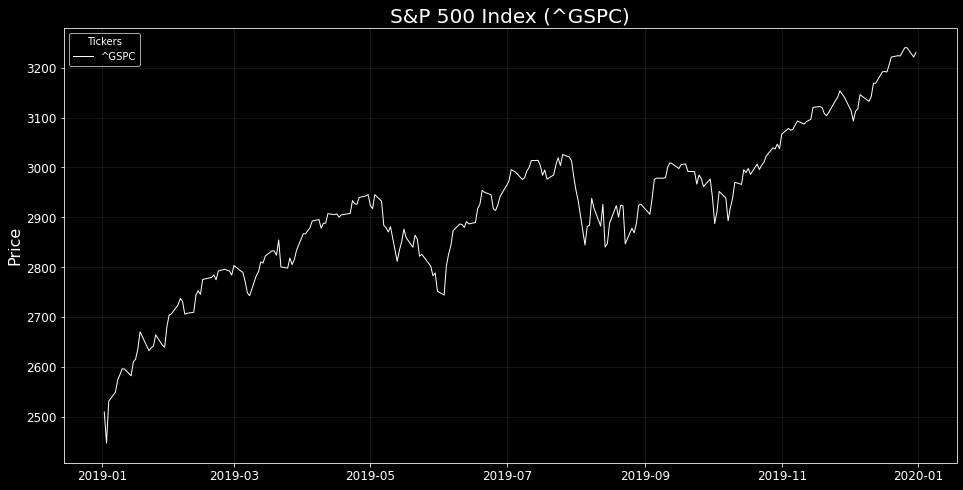

In [33]:
fig, ax1 = plt.subplots(1, figsize=(16, 8))
  
ax1.set_title(f"S&P 500 Index (^GSPC)", fontsize=s[1])
ax1.set_ylabel(f"Price", fontsize=s[2])
ax1.plot(sp500_index.index.values, sp500_index['^GSPC'], label='^GSPC', linewidth=w[1], color=c[0])
ax1.legend(loc='upper left', title = 'Tickers')
ax1.grid(alpha=ga)

plt.xticks(fontsize=s[3])
plt.yticks(fontsize=s[3])
plt.show()


### Use S&P Symbols to Get Adj Close from Yahoo Finance

In [34]:
tickers = Ticker(sp500_tickers, asynchronous=True)

In [ ]:
yf_data_history = tickers.history(start=start_date, end=end_date)

In [ ]:
yf_data_price = tickers.price

In [ ]:
good_tickers = []
error_tickers = {}

for k, v in yf_data_history.items():
    if isinstance(v, pd.DataFrame):
        adjclose = pd.DataFrame(v['adjclose'])
        adjclose['ticker'] = k
        adjclose.index.name = 'date'
        adjclose_df = adjclose.pivot(columns='ticker')
        adjclose_df.columns = [col[1] for col in adjclose_df.columns]
        good_tickers.append(adjclose_df)

    else:
        error_tickers[k] = v
    
sp500_adjclose_df = pd.concat(good_tickers, axis=1)


In [ ]:
sp500_adjclose_df.head()


## Big todo: Do this for S&P Index Data

In [ ]:
# from src.util import SP500SymbolDataRequest

# sp500_sdr = SP500SymbolDataRequest()
# sp500_sdr.to_csv(project_dir + data_interim_dir + 'SP500_from_wiki.csv')

## Data Cleaning
The S&P 500 data from yahoo finance adj close price is almost clean and ready for analysis use. we need to remove tickers that IPO or die mid year, dropping unusable Nan values between specified dates.

In [ ]:
# for k, v in error_tickers.items():
#     print(k, '\t', v)
error_tickers_list = list(error_tickers.keys())
print(error_tickers_list)
len(error_tickers_list)

In [ ]:

print(start_date, ' through ', end_date ,
      '\n------------------------------------------------------------------------------\n')
for k, v in error_tickers.items():
    print(k, '\t', v)


#### Check for Nan values

In [ ]:
tickers_with_nan_values = sp500_adjclose_df.columns[sp500_adjclose_df.isna().any()].tolist()
print(tickers_with_nan_values)


#### Full list of usable tickers

In [ ]:
[error_tickers_list.append(x) for x in tickers_with_nan_values]
print(error_tickers_list)
len(error_tickers_list)
sp500_adjclose_df = sp500_adjclose_df.drop(columns=tickers_with_nan_values)
sp500_adjclose_df

#### Full list of usable tickers

In [ ]:
sp500_wiki_df = sp500_wiki_df[~sp500_wiki_df.Symbol.isin(error_tickers_list)]
print(sp500_wiki_df.Symbol)
print(len(sp500_wiki_df))

sp500_wiki_df = sp500_wiki_df.reset_index()

print(sp500_wiki_df)

In [ ]:
sp500_df = sp500_adjclose_df.copy()

#### Visualize the adj close data

In [ ]:
sp500_sort_by_amax_columns = sp500_df.iloc[:,:].agg([np.min, np.max]).T.sort_values(['amax']).T.columns
sp500_df = sp500_df[sp500_sort_by_amax_columns]
sp500_df.head()

In [ ]:
def _plot_adj_close(ax, df, df_cols, ticker, title=None, ylabel=None):
    ax.set_title(title, fontsize=s[1])
    ax.set_ylabel(ylabel, fontsize=s[2])
    ax.plot(df.index.values, df.iloc[:,:100], linewidth=w[0], color=c[0], alpha=0.15)
    ax.plot(df.index.values, df[ticker], label=ticker, linewidth=w[3], color=c[2])
    
    ax.legend(loc='upper left', title = 'Tickers')
    ax.grid(alpha=ga)


def plot_adj_close(ticker1, ticker2, ticker3, ticker4, ticker5):
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(20, 24))
    
    _plot_adj_close(ax1, sp500_df, sp500_df.loc[:,ticker1], ticker1,
                   f"S&P 500 Stocks ({ticker1})",
                   f"Price")
    _plot_adj_close(ax2, sp500_df, sp500_df.loc[:,ticker2], ticker2,
                   f"S&P 500 Stocks ({ticker1})",
                   f"Price")
    _plot_adj_close(ax3, sp500_df, sp500_df.loc[:,ticker3], ticker3,
                   f"S&P 500 Stocks ({ticker1})",
                   f"Price")
    _plot_adj_close(ax4, sp500_df, sp500_df.loc[:,ticker4], ticker4,
                   f"S&P 500 Stocks ({ticker1})",
                   f"Price")
    _plot_adj_close(ax5, sp500_df, sp500_df.loc[:,ticker5], ticker5,
                   f"S&P 500 Stocks ({ticker1})",
                   f"Price")
    
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()
    return 

interact(plot_adj_close, 
         ticker1=sp500_df.iloc[:,:100], 
         ticker2=sp500_df.iloc[:,100:200], 
         ticker3=sp500_df.iloc[:,200:300], 
         ticker4=sp500_df.iloc[:,300:400], 
         ticker5=sp500_df.iloc[:,400:]
        );



In [ ]:
ALL = 'SELECT ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [ ]:


tickers = None

In [ ]:

def _plot_tickers(ax, df, background_tickers, focus_tickers, legend=True, title=None, ylabel=None):
    ax.set_title(title, fontsize=s[1])
    ax.set_ylabel(ylabel, fontsize=s[2])
 
    for i in range(len(focus_tickers)):
        ax.plot(df.index.values, df[focus_tickers[i]], label=focus_tickers[i], linewidth=w[3], color=c[2])
    
    if background_tickers is not None:  
        for i in focus_tickers:
            background_tickers.remove(i)
            
        if len(background_tickers) <= 10 and len(background_tickers) > 1:
            for i in range(len(background_tickers)):
                ax.plot(df.index.values, df[background_tickers[i]], label=background_tickers[i],  linewidth=w[3], color=c[0], alpha=0.75)
        else:
            ax.plot(df.index.values, df[background_tickers], linewidth=w[3], color=c[0], alpha=0.75)
    
    if legend:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Tickers', ncol=2)
    ax.grid(alpha=ga)


def plot_ticker_list(sector, sub_sector, ticker):

    background_tickers = None
    legend = True   
    if sector == 'SELECT ALL':
        legend = False
    else:
        if ticker != 'SELECT ALL' :
            if sub_sector == 'SELECT ALL' : 
                background_tickers = unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sector"] == sector]['Symbol'])
                background_tickers.remove('SELECT ALL')   
            elif sub_sector != 'SELECT ALL' : 
                background_tickers = unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sub-Industry"] == sub_sector]['Symbol'])
                background_tickers.remove('SELECT ALL')              
              
    fig, (ax1) = plt.subplots(1, figsize=(20, 10))
    
    _plot_tickers(ax1, sp500_df, background_tickers, tickers, legend=legend, 
                  title=f"S&P 500 Stocks\nSector: {sector} \n Sub Industry: {sub_sector} \n Tickers: {ticker}",
                    ylabel=f"Price")
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()

    
    
def select_ticker_list(ticker):

    global tickers
    
    if ticker != 'SELECT ALL':        
        tickers = [dropdown_ticker.value]
    else:
        if dropdown_sector.value != 'SELECT ALL':
            if dropdown_sub_sector.value == 'SELECT ALL':
                tickers = unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
                tickers.remove('SELECT ALL')
            elif dropdown_sub_sector.value != 'SELECT ALLf':
                tickers = unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol'])
                tickers.remove('SELECT ALL')
        else:
            tickers = unique_sorted_values_plus_ALL(sp500_wiki_df['Symbol'])
            tickers.remove('SELECT ALL')
    return tickers


def get_ticker(sub_sector):
    global tickers

    if sub_sector != 'SELECT ALL':
        dropdown_ticker.options = unique_sorted_values_plus_ALL(
            sp500_wiki_df[sp500_wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol']
        )
        tickers = unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol'])
    else:
        dropdown_ticker.options = unique_sorted_values_plus_ALL(
            sp500_wiki_df[sp500_wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol']
        )
        tickers = unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
    tickers.remove('SELECT ALL')


def get_sub_sector(sector):   
    global tickers

    dropdown_sub_sector.options = unique_sorted_values_plus_ALL(
        sp500_wiki_df[sp500_wiki_df["GICS Sector"] == dropdown_sector.value]['GICS Sub-Industry']
    )
    get_ticker(dropdown_sub_sector.value)
    if  dropdown_sector.value != 'SELECT ALL':
        tickers = unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
    else:
        tickers = unique_sorted_values_plus_ALL(sp500_wiki_df['Symbol'])
    tickers.remove('SELECT ALL')


dropdown_sector = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(sp500_wiki_df['GICS Sector']),
        description='GICS Sector:'
)

dropdown_sub_sector = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sector"] == dropdown_sector.value]['GICS Sub-Industry']),
    description='Sub Sector:'
)

dropdown_ticker = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(sp500_wiki_df[sp500_wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol']),
    description='Ticker:'
)

btn_plot = widgets.Button(description='Plot')


i = widgets.interactive(get_sub_sector, sector=dropdown_sector)
j = widgets.interactive(get_ticker, sub_sector=dropdown_sub_sector)
k = widgets.interactive(select_ticker_list, ticker=dropdown_ticker)

output_ticker = widgets.Output()

def btn_plot_eventhandler(obj):
    output_ticker.clear_output()
    with output_ticker:
        plot_ticker_list(dropdown_sector.value, dropdown_sub_sector.value, dropdown_ticker.value)


display(i)
display(j)
display(k)

display(btn_plot)

btn_plot.on_click(btn_plot_eventhandler)

tickers = unique_sorted_values_plus_ALL(sp500_wiki_df['Symbol'])
tickers.remove('SELECT ALL')



In [ ]:
display(output_ticker)

## Data Definition

Descriptions of columns values avalible on yahoo finance, might be used later but for now only Adj. Close will be used. 

| # | Column | Description |
| --- | --- | --- |
| 0  | Open        | The price at which a stock trades when an exchange opening of the regular trading day. |
| 1  | High        | The highest price at which a stock traded during the course of the regular trading day. |
| 2  | Low         | The lowest price at which a stock traded during the course of the  regular trading day. |
| 3  | Close       | The last price at which the stock traded during the regular trading day. |
| 4  | Volume      | The number of shares of a stock traded during a given period of time. |
| 5  | Ex-Dividend | The ex-dividend date of a stock is the day on which the stock begins trading without the subsequent dividend value.
 |
| 6  | Split Ratio | A corporate action in which a company divides its existing shares into multiple shares to boost the liquidity of the shares. |
| 7  | Adj. Open   | A stock's opening price to reflect that stock's value after accounting for any corporate actions. |
| 8  | Adj. High   | A stock's high price during the course of the  regular trading day that reflect that stock's value after accounting for any corporate actions. |
| 9  | Adj. Low    | A stock's low price during the course of the  regular trading day that reflect that stock's value after accounting for any corporate actions. |
| 10 | Adj. Close  | A stock's closing price to reflect that stock's value after accounting for any corporate actions. |
| 11 | Adj. Volume | The number of shares of a stock traded during a given period of time after accounting for any corporate actions. |

In [ ]:
sp500_df.info()

In [ ]:
sp500_index.info()

In [ ]:
sp500_wiki_df.info()

Now lets look at price range. We can see how high and low a stock might be with the given start/end date window within the S&P 500.

In [ ]:
sp500_df.iloc[:,:].agg([np.min, np.max]).T.sort_values(['amax'])

In [ ]:
sp500_df.describe().T

In [ ]:
sp500_df.index.name = 'Date'
sp500_df

## Export SP500 data to a new csv file
In order to bring the changes you made here into the next notebook, write out the updated data frame to a new csv file.

Export the processed dataframe as a csv file to the data folder created earlier. Name this new csv file `data_wrangle_sp500_df_output.csv`.


In [ ]:
sp500_df.to_csv(project_dir + '/data/interim/'+ 'data_wrangle_sp500_df_output.csv', index=True)
sp500_index.to_csv(project_dir + '/data/interim/'+ 'data_wrangle_sp500_index_df_output.csv', index=True)
sp500_wiki_df.to_csv(project_dir + '/data/interim/'+ 'data_wrangle_sp500_wiki_data_df_output.csv', index=True)
sp500_slick_df.to_csv(project_dir + '/data/interim/'+ 'data_wrangle_sp500_slick_data_df_output.csv', index=True)



In [ ]:
sp500_slick_df